In [2]:
import scanpy as sc

In [3]:
adata = sc.read('D:/UCI Research/CellxGene Tutorial/Exercises/brain_normalized.h5ad')

In [4]:
# Make a dictionary that contains gene symbols and their associated Ensembl IDs
markers = {'Sox9': 'ENSG00000125398',
           'Cd45': 'ENSG00000081237',
           'Mog': 'ENSG00000204655',
#            'REPLACE_GENE_SYMBOL': 'REPLACE_ENSEMBL_GENE_ID'
          }

In [6]:
print('ENSG00000125398' in adata.var.index) # Sox9 is present
print('ENSG00000081237' in adata.var.index) # Cd45 is present

True
True


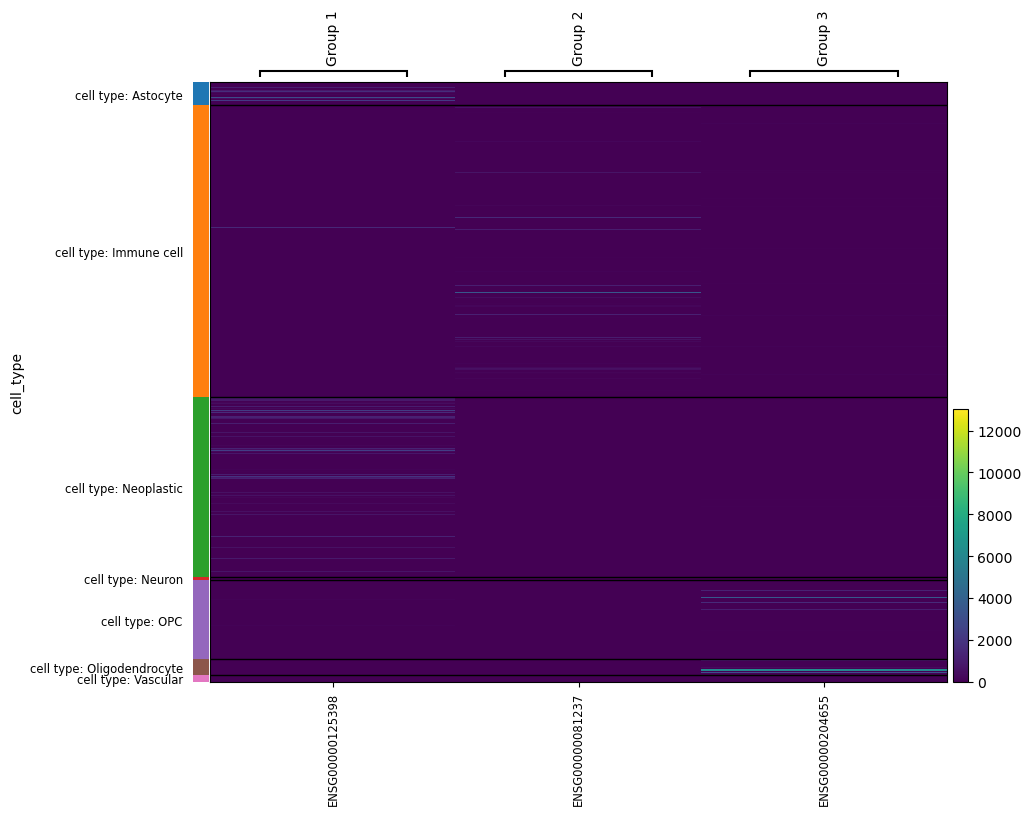

In [8]:
marker_genes = {
    'Group 1': ['ENSG00000125398'],  # Sox9
    'Group 2': ['ENSG00000081237'],  # Cd45
    'Group 3': ['ENSG00000204655']   # Mog
}

sc.pl.heatmap(
    adata,
    var_names=marker_genes,
    groupby="cell_type",  # change this if your column name is different
    use_raw=False,
    log=False,
    cmap="viridis",
    figsize=(10, 8)
)

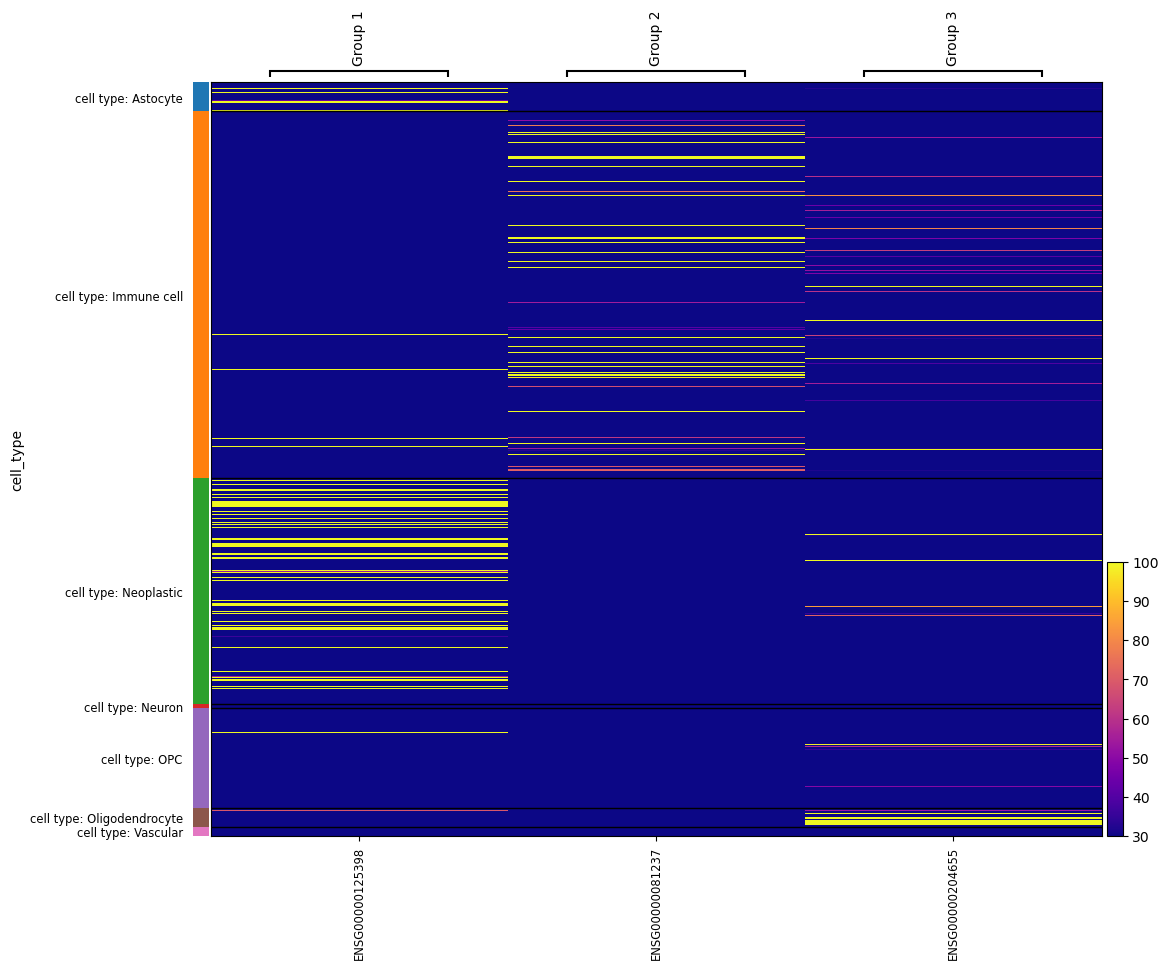

In [17]:
sc.pl.heatmap(
    adata,
    var_names=marker_genes,
    groupby="cell_type",
    use_raw=False,
    log=False,
    cmap="plasma",     # Change colormap
    vmin=30,           # Set minimum value for color scaling
    vmax=100,           # Set maximum value for color scaling
    figsize=(12, 10)
)


In [15]:
help(sc.pl.heatmap)

Help on function heatmap in module scanpy.plotting._anndata:

heatmap(adata: anndata._core.anndata.AnnData, var_names: Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]]], groupby: Union[str, Sequence[str]], use_raw: Optional[bool] = None, log: bool = False, num_categories: int = 7, dendrogram: Union[bool, str] = False, gene_symbols: Optional[str] = None, var_group_positions: Optional[Sequence[Tuple[int, int]]] = None, var_group_labels: Optional[Sequence[str]] = None, var_group_rotation: Optional[float] = None, layer: Optional[str] = None, standard_scale: Optional[Literal['var', 'obs']] = None, swap_axes: bool = False, show_gene_labels: Optional[bool] = None, show: Optional[bool] = None, save: Union[str, bool, NoneType] = None, figsize: Optional[Tuple[float, float]] = None, vmin: Optional[float] = None, vmax: Optional[float] = None, vcenter: Optional[float] = None, norm: Optional[matplotlib.colors.Normalize] = None, **kwds)
    Heatmap of the expression values of genes.


# How does marker gene expression relate to principal components analysis scores across different cell types?

In [18]:
sc.tl.pca(adata)

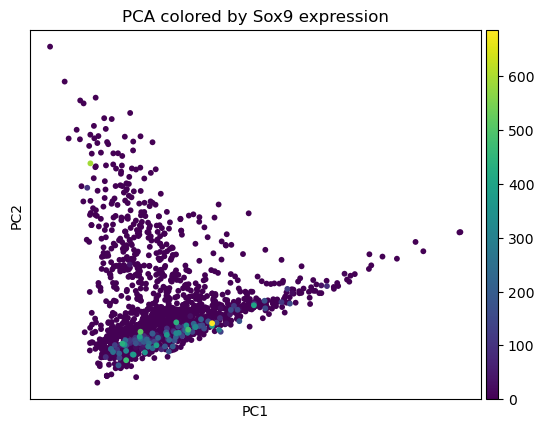

In [19]:
sc.pl.pca_scatter(
    adata,
    color="ENSG00000125398",  # or replace with what u want
    title="PCA colored by Sox9 expression"
)


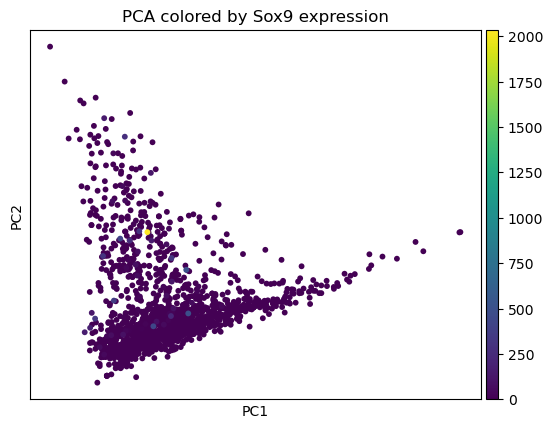

In [20]:
sc.pl.pca_scatter(
    adata,
    color="ENSG00000081237",  # or replace with what u want
    title="PCA colored by Sox9 expression"
)


In [21]:
import matplotlib.pyplot as plt

In [22]:
# Ensure PCA is computed
if 'X_pca' not in adata.obsm.keys():
    sc.tl.pca(adata)

# Define the marker genes
markers = {
    'Sox9': 'ENSG00000125398',
    'Cd45': 'ENSG00000081237',
    'Mog': 'ENSG00000204655'
}

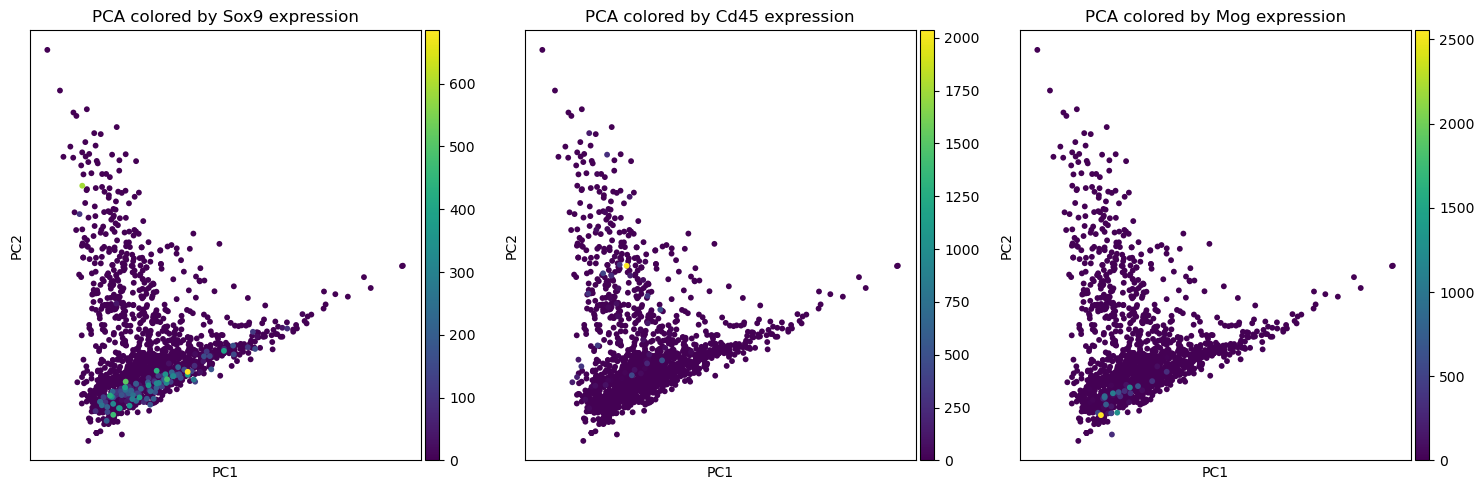

In [23]:
# Set up the subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the marker genes and plot
for ax, (gene_name, gene_id) in zip(axs, markers.items()):
    sc.pl.pca_scatter(
        adata,
        color=gene_id,  # or gene_name if your `adata` uses gene symbols as variable names
        title=f"PCA colored by {gene_name} expression",
        ax=ax,
        show=False  # We'll show the plot later after all customizations
    )

plt.tight_layout()
plt.show()